In [27]:
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd

all_books_data = []

# GETTING FIRST 5 PAGES
for page_num in range(1, 6):
    pages = f"https://books.toscrape.com/catalogue/page-{page_num}.html"
    response = requests.get(pages)

    # Checking if page exists
    if response.status_code != 200:
        print("Page", page_num, "not found. Stopping.")
        break

    # Parse the HTML content for the current page
    soup = BeautifulSoup(resp.content, "html.parser")

    # Find all book articles on this page
    all_books_onpage = soup.find_all("article", class_="product_pod")

    # Loop through the books found on THIS page
    for book in all_books_onpage:
        title = book.h3.a["title"]
        price = book.find("p", class_="price_color").text.strip("£")  # site uses £
        rating = book.p["class"][1]

        # Append the dictionary directly to our main list
        all_books_data.append({
            "title": title,
            "price": price,
            "rating": rating,
        })

    print("Page", page_num, "scraped. Waiting 1 second...")
    time.sleep(1)

# Save to CSV
df = pd.DataFrame(all_books_data)
df.to_csv("ALL_Books_scraped.csv", index=False)

Page 1 scraped. Waiting 1 second...
Page 2 scraped. Waiting 1 second...
Page 3 scraped. Waiting 1 second...
Page 4 scraped. Waiting 1 second...
Page 5 scraped. Waiting 1 second...


In [24]:

data = pd.read_csv("All_Books_scraped.csv")
print(data)

                                                title  price rating
0                                A Light in the Attic  51.77  Three
1                                  Tipping the Velvet  53.74    One
2                                          Soumission  50.10    One
3                                       Sharp Objects  47.82   Four
4               Sapiens: A Brief History of Humankind  54.23   Five
..                                                ...    ...    ...
95  Lumberjanes Vol. 3: A Terrible Plan (Lumberjan...  19.92    Two
96  Layered: Baking, Building, and Styling Spectac...  40.11    One
97  Judo: Seven Steps to Black Belt (an Introducto...  53.90    Two
98                                               Join  35.67   Five
99          In the Country We Love: My Family Divided  22.00   Four

[100 rows x 3 columns]


In [25]:
print(data.isnull().sum())


title     0
price     0
rating    0
dtype: int64
Empty DataFrame
Columns: [title, price, rating]
Index: []


In [30]:
data['price'] = pd.to_numeric(df['price'], errors='coerce')
print(type(data['price']))

<class 'pandas.core.series.Series'>


Visualizing the DATA

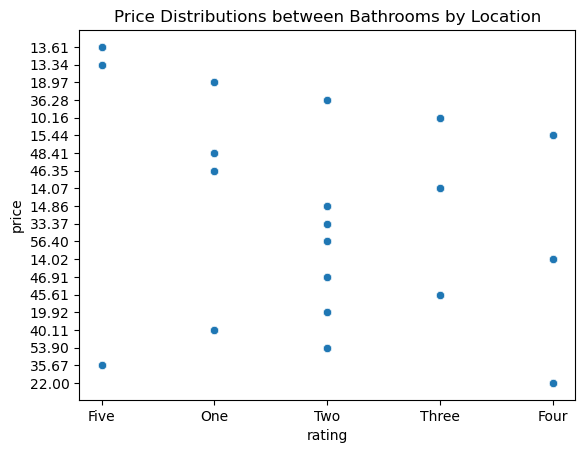

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='rating', y='price')
plt.title('Price Distributions between Bathrooms by Location')
plt.show()